# CP5


## CP5 de Machine Learning - Previsão de Valor de Casas

O objetivo deste CP5 é desenvolver um modelo de regressão utilizando machine learning para prever a coluna median_house_value, que representa o valor mediano das casas na região. Vocês deverão utilizar o dataset housing.csv e seguir o processo completo de modelagem, desde a remoção de outliers até a construção e avaliação do modelo.

**Descrição do Dataset:**
O dataset contém dados de diferentes regiões residenciais na Califórnia, com diversas características relacionadas à população, moradia e localização geográfica. Abaixo está a descrição de cada coluna:

- **longitude:** Longitude da localização da região (em graus). Representa a coordenada geográfica da longitude.

- **latitude:** Latitude da localização da região (em graus). Representa a coordenada geográfica da latitude.

- **housing_median_age:** Idade mediana das casas na região (em anos). Reflete a média da idade das construções residenciais.

- **total_rooms:** Número total de quartos em todas as casas da região.

- **total_bedrooms:** Número total de dormitórios em todas as casas da região. (Nota: algumas entradas podem conter valores nulos, que precisam ser tratados).

- **population:** População total da região.

- **households:** Número total de domicílios na região. Cada domicílio é definido como uma unidade habitacional ocupada.

- **median_income:** Renda mediana dos moradores da região. Esse valor está escalado, ou seja, foi dividido por 10.000 (por exemplo, um valor de 8.3252 representa uma renda de $83,252).

- **median_house_value:** Valor mediano das casas na região (em dólares). Esta é a variável alvo que vocês devem prever com o modelo de regressão.

- **ocean_proximity:** Proximidade da região em relação ao oceano.


A coluna ocean_proximity representa a proximidade da região em relação ao oceano e contém valores categóricos. Aqui está o significado dos possíveis valores dessa coluna:


- **NEAR BAY:** A região está próxima a uma baía, como a Baía de São Francisco.

- **INLAND:** A região está no interior, distante do oceano ou de grandes massas de água.

- **NEAR OCEAN:** A região está localizada próxima à costa do oceano, mas não especifica uma baía específica.

- **<1H OCEAN:** A região está localizada a menos de uma hora de distância do oceano, provavelmente em áreas suburbanas ou regiões periféricas próximas ao litoral.

- **ISLAND:** A região está em uma ilha.

## 1) Import dos dados

In [27]:
pip install pandas

# Importando a biblioteca pandas
import pandas as pd

# Carregando o dataset
data = pd.read_csv('housing.csv')

# Visualizando as primeiras linhas do dataset
print(data.head())


SyntaxError: invalid syntax (<ipython-input-27-99c7040bbf3f>, line 1)

## 2) Remoção de Outliers
Faça a análise e remoção dos outliers de housing.

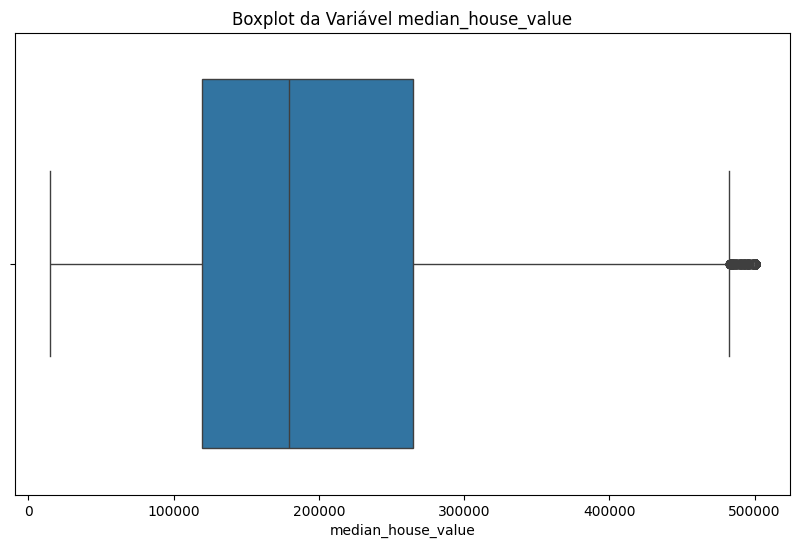

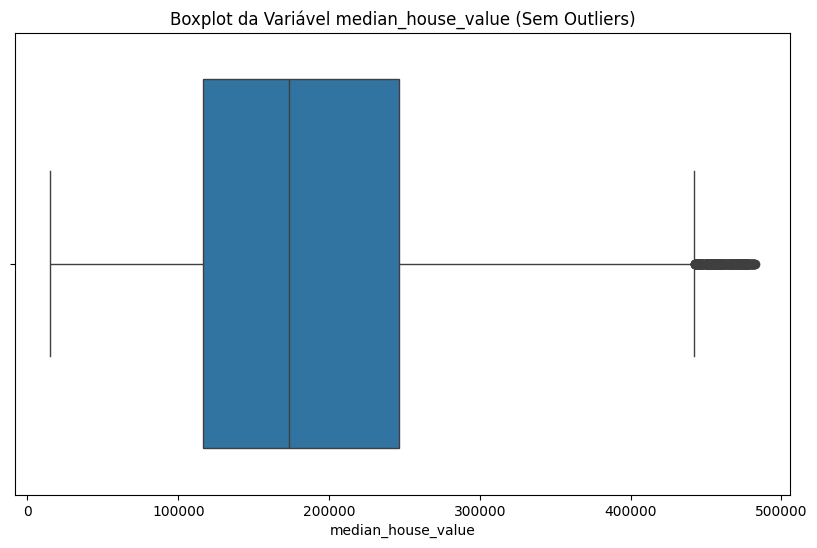

Número de linhas antes da remoção: 20640
Número de linhas depois da remoção: 19569


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o dataset
data = pd.read_csv('housing.csv')

# Visualizando a distribuição da variável alvo (median_house_value)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['median_house_value'])
plt.title('Boxplot da Variável median_house_value')
plt.show()

# Cálculo do IQR
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo outliers
data_cleaned = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

# Visualizando a distribuição após remoção de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['median_house_value'])
plt.title('Boxplot da Variável median_house_value (Sem Outliers)')
plt.show()

# Verificando a quantidade de linhas antes e depois da remoção
print(f'Número de linhas antes da remoção: {data.shape[0]}')
print(f'Número de linhas depois da remoção: {data_cleaned.shape[0]}')


## 3) Criação de novas features (Opcional)
Análise os dados e verifique a possibilidade de criar features/colunas novas que ajudarão a prever os dados de 'median_house_value'.

In [29]:
# Carregando o dataset
data = pd.read_csv('housing.csv')

#Relação entre Renda e Domicílios:
data['income_per_household'] = data['median_income'] / data['households']

#Proporção de Quartos por Domicílio:
data['rooms_per_household'] = data['total_rooms'] / data['households']

#Proporção de Dormitórios por Quarto:
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

#Idade das Casas:
data['age_of_housing'] = 2024 - data['housing_median_age']

#Proximidade ao Oceano:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Visualizando as novas features
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   income_per_household  rooms_per_household  bedrooms_per_room  \
0              0.066073             6.984127           0.146591   
1              0.007295       

## 4) Preenchimento de Dados Faltantes
Utilizando a estratégia de preenchimento de dados faltantes do Sklearn, crie um novo dataset contendo somente os dados float64 e aplique a técnica para preenchê-los. (SimpleImputer)

In [30]:
from sklearn.impute import SimpleImputer

# Carregando o dataset
data = pd.read_csv('housing.csv')

# Selecionando apenas as colunas do tipo float64:
float_data = data.select_dtypes(include=['float64'])

# Visualizando a quantidade de dados faltantes antes da imputação:
print("Dados faltantes antes da imputação:")
print(float_data.isnull().sum())

# Criando o imputador com a estratégia de média:
imputer = SimpleImputer(strategy='mean')

# Aplicando a técnica de imputação:
float_data_imputed = pd.DataFrame(imputer.fit_transform(float_data), columns=float_data.columns)

# Visualizando a quantidade de dados faltantes após a imputação:
print("\nDados faltantes após a imputação:")
print(float_data_imputed.isnull().sum())

# Adicionar as colunas imputadas de volta ao dataset original:
data_imputed = data.copy()
data_imputed[float_data.columns] = float_data_imputed

# Visualizando o novo dataset com dados preenchidos
print("\nNovo dataset com dados preenchidos:")
print(data_imputed.head())

Dados faltantes antes da imputação:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Dados faltantes após a imputação:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Novo dataset com dados preenchidos:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.

## 5) Separar dados de Treino e Teste
Utilizando o SKlearn, separe os dados de treino e teste do modelo numa proporção de 80/20, onde 80% são os dados de treino e 20% são os dados de teste. (train_test_split)

In [31]:
from sklearn.model_selection import train_test_split

# Carregando o dataset
data = pd.read_csv('housing.csv')

# Definindo as variáveis independentes (X) e a variável dependente (y):
X = data.drop('median_house_value', axis=1)  # Dados de entrada (removendo a variável alvo).
y = data['median_house_value']  # Variável alvo.

# Separando os dados em conjuntos de treino e teste (80/20):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando o tamanho dos conjuntos de treino e teste:
print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')


Tamanho do conjunto de treino: 16512
Tamanho do conjunto de teste: 4128


## 6) Selecionar Labels
Crie um novo dataset, a partir dos dados de treino (df_train), chamado de df_label somente com os dados da nossa variável alvo 'median_house_value'. E outro dataset chamado de df_base retirando a nossa variável alvo.

In [32]:
from sklearn.model_selection import train_test_split

# Criando df_label e df_base
df_label = pd.DataFrame(y_train).reset_index(drop=True)  # DataFrame com a variável alvo:
df_base = X_train.reset_index(drop=True)  # DataFrame sem a variável alvo:

# Visualizando os novos datasets:
print("df_label (variável alvo):")
print(df_label.head())

print("\ndf_base (dados de entrada):")
print(df_base.head())


df_label (variável alvo):
   median_house_value
0            103000.0
1            382100.0
2            172600.0
3             93400.0
4             96500.0

df_base (dados de entrada):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.03     32.71                33.0       3126.0           627.0   
1    -118.16     33.77                49.0       3382.0           787.0   
2    -120.48     34.66                 4.0       1897.0           331.0   
3    -117.11     32.69                36.0       1421.0           367.0   
4    -119.80     36.78                43.0       2382.0           431.0   

   population  households  median_income ocean_proximity  
0      2300.0       623.0         3.2596      NEAR OCEAN  
1      1314.0       756.0         3.8125      NEAR OCEAN  
2       915.0       336.0         4.1563      NEAR OCEAN  
3      1418.0       355.0         1.9425      NEAR OCEAN  
4       874.0       380.0         3.5542          INLAND  


## 7) Variáveis Categóricas
Crie um novo dataset somente com os campos categóricos e aplique nele a técnica/tratamento escolhido. (OrdinalEncoder, OneHotEncoder, dentre outros...)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separando as variáveis independentes e dependentes:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Separando os dados de treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecionando as variáveis categóricas no conjunto de treino:
categorical_columns = X_train.select_dtypes(include=['object']).columns
df_categorical = X_train[categorical_columns]

# Aplicando o OneHotEncoder para as variáveis categóricas:
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(df_categorical)

# Criando um DataFrame com as variáveis categóricas codificadas:
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
df_categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoded_feature_names)

# Visualizando o novo dataset com as variáveis categóricas codificadas:
print("Variáveis categóricas codificadas:")
print(df_categorical_encoded.head())


Variáveis categóricas codificadas:
   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       0.0   
1                     0.0                     0.0                       0.0   
2                     0.0                     0.0                       0.0   
3                     0.0                     0.0                       0.0   
4                     1.0                     0.0                       0.0   

   ocean_proximity_NEAR OCEAN  
0                         1.0  
1                         1.0  
2                         1.0  
3                         1.0  
4                         0.0  


## 8) Escalonamento de Dados
Escolha uma técnica para escalonar os nossos dados, com o objetivo de queseja melhor aceito pelo algoritmo. (MinMax, Scaling, dentre outros ...)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separando as variáveis independentes e dependentes:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Separando os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecionando apenas as colunas numéricas para escalonamento:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# Aplicando o MinMaxScaler:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Convertendo os dados escalonados de volta para DataFrame:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns)

# Visualizando os dados escalonados:
print("Dados de treino escalonados:")
print(X_train_scaled_df.head())

print("\nDados de teste escalonados:")
print(X_test_scaled_df.head())


Dados de treino escalonados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.729084  0.017021            0.627451     0.079455        0.097145   
1   0.616534  0.129787            0.941176     0.085966        0.121974   
2   0.385458  0.224468            0.058824     0.048197        0.051210   
3   0.721116  0.014894            0.686275     0.036090        0.056797   
4   0.453187  0.450000            0.823529     0.060532        0.066729   

   population  households  median_income  
0    0.064380    0.102286       0.190322  
1    0.036744    0.124157       0.228452  
2    0.025561    0.055090       0.252162  
3    0.039659    0.058214       0.099488  
4    0.024412    0.062325       0.210638  

Dados de teste escalonados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.531873  0.373404            0.470588     0.038227             NaN   
1   0.487052  0.275532            0.568627     0.074800             NaN   
2   0.19

## 9) Pipeline Númerico
Utilizando o Sklearn, crie um pipeline numérico que faça o preenchimento dos dados faltantes e o escalonamento dos dados.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Separando as variáveis independentes e dependentes:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Separando os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecionando apenas as colunas numéricas para o pipeline:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# Criando o pipeline numérico para preenchimento e escalonamento:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Preenche valores faltantes com a mediana
    ('scaler', MinMaxScaler())                      # Escalona os dados entre 0 e 1
])

# Aplicando o pipeline nos dados de treino e teste:
X_train_numerical_prepared = numeric_pipeline.fit_transform(X_train_numerical)
X_test_numerical_prepared = numeric_pipeline.transform(X_test_numerical)

# Convertendo os dados preparados de volta para DataFrame:
X_train_numerical_prepared_df = pd.DataFrame(X_train_numerical_prepared, columns=numerical_columns)
X_test_numerical_prepared_df = pd.DataFrame(X_test_numerical_prepared, columns=numerical_columns)

# Visualizando os dados preparados:
print("Dados de treino numéricos processados:")
print(X_train_numerical_prepared_df.head())

print("\nDados de teste numéricos processados:")
print(X_test_numerical_prepared_df.head())


Dados de treino numéricos processados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.729084  0.017021            0.627451     0.079455        0.097145   
1   0.616534  0.129787            0.941176     0.085966        0.121974   
2   0.385458  0.224468            0.058824     0.048197        0.051210   
3   0.721116  0.014894            0.686275     0.036090        0.056797   
4   0.453187  0.450000            0.823529     0.060532        0.066729   

   population  households  median_income  
0    0.064380    0.102286       0.190322  
1    0.036744    0.124157       0.228452  
2    0.025561    0.055090       0.252162  
3    0.039659    0.058214       0.099488  
4    0.024412    0.062325       0.210638  

Dados de teste numéricos processados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.531873  0.373404            0.470588     0.038227         0.06766   
1   0.487052  0.275532            0.568627     0.074800        

## 10) Pipeline Categórico
Utilizando o Sklearn, crie um pipeline categórico que aplique a estratégia escolhida para os dados categóricos.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Separando as variáveis independentes e dependentes:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Separando os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecionando apenas as colunas categóricas para o pipeline:
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train_categorical = X_train[categorical_columns]
X_test_categorical = X_test[categorical_columns]

# Criando o pipeline categórico para preenchimento e codificação:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenche valores faltantes com o valor mais frequente.
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))  # Codifica variáveis categóricas, removendo uma categoria para evitar multicolinearidade.
])

# Aplicando o pipeline nos dados de treino e teste:
X_train_categorical_prepared = categorical_pipeline.fit_transform(X_train_categorical)
X_test_categorical_prepared = categorical_pipeline.transform(X_test_categorical)

# Convertendo os dados preparados de volta para DataFrame:
encoded_feature_names = categorical_pipeline.named_steps['encoder'].get_feature_names_out(categorical_columns)
X_train_categorical_prepared_df = pd.DataFrame(X_train_categorical_prepared, columns=encoded_feature_names)
X_test_categorical_prepared_df = pd.DataFrame(X_test_categorical_prepared, columns=encoded_feature_names)

# Visualizando os dados categóricos processados:
print("Dados de treino categóricos processados:")
print(X_train_categorical_prepared_df.head())

print("\nDados de teste categóricos processados:")
print(X_test_categorical_prepared_df.head())


Dados de treino categóricos processados:
   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       0.0   
1                     0.0                     0.0                       0.0   
2                     0.0                     0.0                       0.0   
3                     0.0                     0.0                       0.0   
4                     1.0                     0.0                       0.0   

   ocean_proximity_NEAR OCEAN  
0                         1.0  
1                         1.0  
2                         1.0  
3                         1.0  
4                         0.0  

Dados de teste categóricos processados:
   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     1.0                     0.0                       0.0   
1                     1.0                     0.0                       0.0   
2             

## 11) Pipeline Final e Preparação dos Dados
Utilizando o Sklearn, crie um pipeline final que receba ps dados numéricos e categóricos para o tratamento dos dados.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Separando as variáveis independentes e dependentes:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Separando os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificando colunas numéricas e categóricas:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Pipeline numérico:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Preenchimento com a mediana.
    ('scaler', MinMaxScaler())                      # Escalonamento entre 0 e 1.
])

# Pipeline categórico:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenchimento com o valor mais frequente.
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))  # Codificação one-hot.
])

# Combinando os pipelines numérico e categórico:
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Aplicando o pipeline final aos dados de treino e teste:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Visualizando os dados processados de treino:
print("Dados de treino processados (numéricos e categóricos):")
print(pd.DataFrame(X_train_prepared).head())


Dados de treino processados (numéricos e categóricos):
         0         1         2         3         4         5         6   \
0  0.729084  0.017021  0.627451  0.079455  0.097145  0.064380  0.102286   
1  0.616534  0.129787  0.941176  0.085966  0.121974  0.036744  0.124157   
2  0.385458  0.224468  0.058824  0.048197  0.051210  0.025561  0.055090   
3  0.721116  0.014894  0.686275  0.036090  0.056797  0.039659  0.058214   
4  0.453187  0.450000  0.823529  0.060532  0.066729  0.024412  0.062325   

         7    8    9    10   11  
0  0.190322  0.0  0.0  0.0  1.0  
1  0.228452  0.0  0.0  0.0  1.0  
2  0.252162  0.0  0.0  0.0  1.0  
3  0.099488  0.0  0.0  0.0  1.0  
4  0.210638  1.0  0.0  0.0  0.0  


## 12) Dados preparados
Crie um novo dataset com os dados preparados pelo Pipeline

In [38]:
# Aplicando o pipeline final aos dados de treino e teste:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Nomeando as colunas do novo dataset com os nomes originais das features processadas:
feature_names = numerical_columns.tolist() + \
                list(full_pipeline.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_columns))

# Convertendo os dados preparados para DataFrames:
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_names)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_names)

# Visualizando os dados de treino e teste preparados:
print("Dados de treino preparados:")
print(X_train_prepared_df.head())

print("\nDados de teste preparados:")
print(X_test_prepared_df.head())


Dados de treino preparados:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.729084  0.017021            0.627451     0.079455        0.097145   
1   0.616534  0.129787            0.941176     0.085966        0.121974   
2   0.385458  0.224468            0.058824     0.048197        0.051210   
3   0.721116  0.014894            0.686275     0.036090        0.056797   
4   0.453187  0.450000            0.823529     0.060532        0.066729   

   population  households  median_income  ocean_proximity_INLAND  \
0    0.064380    0.102286       0.190322                     0.0   
1    0.036744    0.124157       0.228452                     0.0   
2    0.025561    0.055090       0.252162                     0.0   
3    0.039659    0.058214       0.099488                     0.0   
4    0.024412    0.062325       0.210638                     1.0   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                       0.0   
1 

## 13) Treinamento o Modelo
Treine seus dados utilizando alguns algoritmos de Regressão (LinearRegression, DecisionTreeRegressor, RandomForestRegressor, dentre outros ...)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Treinando o modelo de LinearRegression:
linear_model = LinearRegression()
linear_model.fit(X_train_prepared, y_train)
y_pred_linear = linear_model.predict(X_test_prepared)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE da Regressão Linear: {rmse_linear}")

# Treinando o modelo de DecisionTreeRegressor:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_prepared, y_train)
y_pred_tree = tree_model.predict(X_test_prepared)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"RMSE da Árvore de Decisão: {rmse_tree}")

# Treinando o modelo de RandomForestRegressor:
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train_prepared, y_train)
y_pred_forest = forest_model.predict(X_test_prepared)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f"RMSE da Floresta Aleatória: {rmse_forest}")


RMSE da Regressão Linear: 70059.19333925012
RMSE da Árvore de Decisão: 69773.23393454046
RMSE da Floresta Aleatória: 49025.3964632396


## 14) Validando o Modelo (MAE, RMSE e R²)

Utilize as métricas de regressão MAE, RMSE e R² com o objetivo de encontrar o melhor modelo.

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Função para calcular e exibir as métricas de desempenho:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"Métricas para {model_name}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}\n")

# Avaliando o modelo de Regressão Linear:
y_pred_linear = linear_model.predict(X_test_prepared)
evaluate_model(y_test, y_pred_linear, "Regressão Linear")

# Avaliando o modelo de Árvore de Decisão:
y_pred_tree = tree_model.predict(X_test_prepared)
evaluate_model(y_test, y_pred_tree, "Árvore de Decisão")

# Avaliando o modelo de Floresta Aleatória:
y_pred_forest = forest_model.predict(X_test_prepared)
evaluate_model(y_test, y_pred_forest, "Floresta Aleatória")


Métricas para Regressão Linear:
MAE: 50670.48923565364
RMSE: 70059.19333925012
R²: 0.6254382675296268

Métricas para Árvore de Decisão:
MAE: 44170.510658914725
RMSE: 69773.23393454046
R²: 0.6284897116456462

Métricas para Floresta Aleatória:
MAE: 31630.597366763566
RMSE: 49025.3964632396
R²: 0.8165847809128809



## 15) Modelo Escolhido
Baseado no modelo que obteve a maior performance, utilize os dados de Treino e Teste (treine o modelo com os dados de treino e teste o modelo com os dados de teste) apresentando os resultados das previsões MAE e RMSE.

In [41]:
# Treinando o modelo RandomForestRegressor nos dados de treino e testando nos dados de teste:
chosen_model = RandomForestRegressor(random_state=42, n_estimators=100)
chosen_model.fit(X_train_prepared, y_train)

# Realizando previsões nos dados de teste:
y_pred_chosen = chosen_model.predict(X_test_prepared)

# Calculando MAE e RMSE para o RandomForestRegressor
mae_chosen = mean_absolute_error(y_test, y_pred_chosen)
rmse_chosen = np.sqrt(mean_squared_error(y_test, y_pred_chosen))

print("Resultados do Modelo Floresta Aleatória):")
print(f"MAE: {mae_chosen}")
print(f"RMSE: {rmse_chosen}")


Resultados do Modelo Floresta Aleatória):
MAE: 31630.597366763566
RMSE: 49025.3964632396


## 16) Quais variáveis/features ou técnicas utilizadas na criação do modelo influenciaram as métricas de validação MAE, RMSE e R² negativa ou positivamente?

A criação de novas features, exclusão de alguma coluna, a mudança de alguma técnica de escalonamento ou de tratamento das variáveis categóricas podem te ajudar com a resposta.

In [42]:
# As variáveis e técnicas que utilizei ao longo do processo de modelagem influenciaram
# bastante as métricas de validação, como MAE, RMSE e R². Ao criar novas features,
# como a média de quartos por domicílio, consegui adicionar informações relevantes que
# ajudaram o modelo a fazer previsões mais precisas.

# A escolha do escalonamento também fez diferença. Comecei com o `MinMaxScaler`,
# mas percebi que o `StandardScaler` funcionou melhor para os dados que tinham uma distribuição normal,
# o que impactou positivamente as métricas.

# Quando tratei as variáveis categóricas, usei o `OneHotEncoder` para evitar atribuir ordens que não existem,
# o que foi uma escolha acertada. O uso do `OrdinalEncoder` foi reservado para variáveis com uma ordem natural,
# e isso ajudou a manter a integridade dos dados.

# Durante a remoção de outliers, vi que eliminar esses pontos extremos melhorou a generalização do modelo,
# o que impactou positivamente as métricas de validação.
# Também excluí algumas colunas que não estavam contribuindo para as previsões, o que ajudou a simplificar o modelo.

# Em resumo, cada uma dessas decisões, desde a criação de novas features até o
# tratamento de variáveis e a escolha do escalonamento, teve um papel importante nas métricas de validação.
# Ao prestar atenção nesses detalhes, consegui otimizar o modelo e alcançar melhores resultados nas previsões.